In [1]:
from Predictions.RunSVM_copy4matrix import *
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from scipy.cluster.vq import whiten
import numpy as np
import matplotlib.pyplot as plt

from robust.pcp import pcp
from robust.rpca import *
from robust.r_pca import *
from robust.rpcaADMM import *

In [2]:
#Read data
train_features = np.genfromtxt("dense_data/train_features.csv", delimiter=",")
valid_features = np.genfromtxt("dense_data/valid_features.csv", delimiter=",")
train_target = list(np.genfromtxt("dense_data/train_target.csv" , delimiter=","))
valid_target = list(np.genfromtxt("dense_data/valid_target.csv" , delimiter=","))

In [75]:
means = np.mean( train_features , axis=0)
std_devs = np.std(train_features, axis = 0)


## Regular PCA

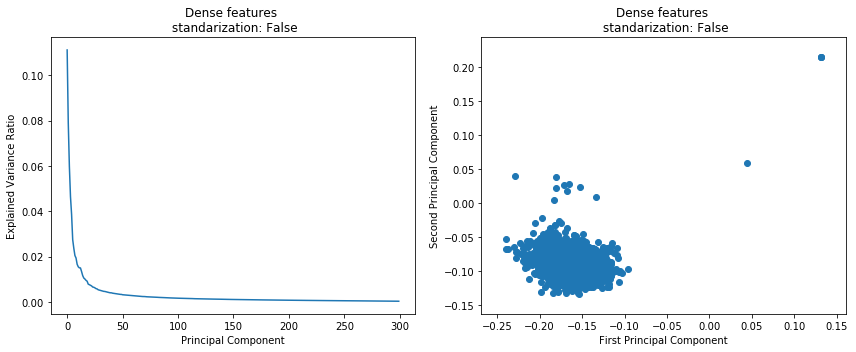

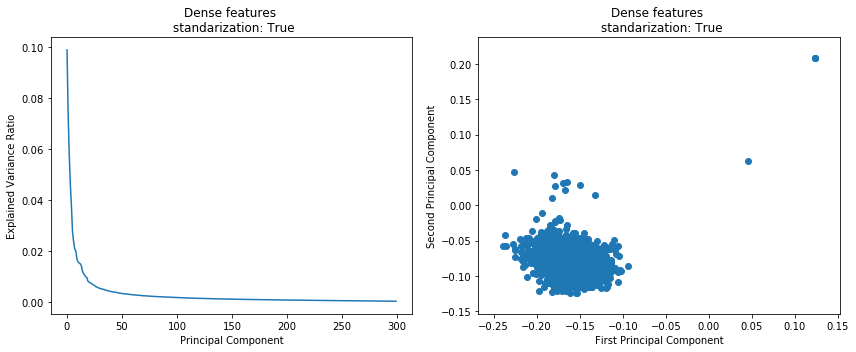

16
0.524264719947
0.0101543305549


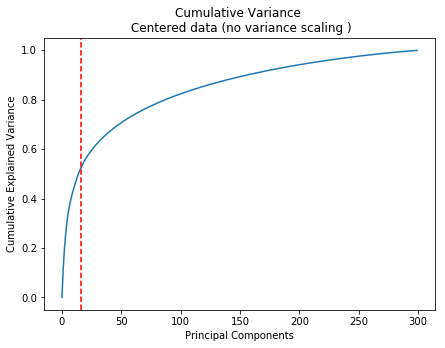

In [318]:
# Regular PCA

std = [False,True]

var_ratio = []
proj = []

for x in std: 
    scaled = scale( np.concatenate((train_features,valid_features), axis = 0)  ,with_std = x)
    
    pca = PCA()
    pca.fit(scaled)

    projected = pca.transform(train_features)
    k = 'Dense features \n standarization: ' + str(x)

    var_ratio.append(pca.explained_variance_ratio_)
    proj.append(projected)
    
    #Transformed valid data
    if not x:
        aux_data = valid_features - means
        proj.append(pca.transform(aux_data))
    if x: 
        aux_data = (valid_features /std_devs)-means
        proj.append(pca.transform( aux_data   ))
    
    plt.figure(figsize=(12,5)) 
    plt.subplot(1, 2, 1)
    plt.plot(pca.explained_variance_ratio_)
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.title(k)
    plt.subplot(1, 2, 2)
    plt.scatter(projected[:,0],projected[:,1])
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title(k)
    plt.tight_layout()
    plt.show()

    
n = 16
print(n)
print (sum(var_ratio[0][:n]))
print (var_ratio[0][n])

cumvar = [ sum(var_ratio[0][:i]) for i in range(len(var_ratio[0])) ]

plt.figure(figsize=(7,5)) 
plt.plot(cumvar)
plt.axvline(n, color = 'r' , linestyle = '--' )
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance \n Centered data (no variance scaling )')
plt.show()    

## Robust PCA

In [50]:
def rpca_eval(L,S,n=16):
    rpca_ = {'Low-Rank features':L,'Sparse features':S}

    var_ = {}
    proj_ = {}


    for k in rpca_.keys():

        scaled = scale( rpca_[k] , with_std = False)
        pca = PCA()
        pca.fit(scaled)

        var_[k] = pca.explained_variance_ratio_
        projected = pca.fit_transform(scaled)

        proj_[k] = projected
        
        

        plt.figure(figsize=(12,5)) 
        plt.subplot(1, 2, 1)
        plt.plot(pca.explained_variance_ratio_)
        plt.xlabel('Principal Component')
        plt.ylabel('Explained Variance Ratio')
        plt.title(k)
        plt.subplot(1, 2, 2)
        plt.scatter(projected[:,0],projected[:,1])
        plt.xlabel('First Principal Component')
        plt.ylabel('Second Principal Component')
        plt.title(k)
        plt.tight_layout()
        plt.show()

    plt.figure(figsize=(10,7))
    for k in rpca_.keys():plt.scatter(proj_[k][:,0],proj_[k][:,1],label = k)
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title(k)
    plt.legend()
    plt.show()

    cumvar_low = [ sum(var_['Low-Rank features'][:i]) for i in range(len(var_['Low-Rank features'])) ]
    cumvar_sparse = [ sum(var_['Sparse features'][:i]) for i in range(len(var_['Sparse features'])) ]

    plt.figure(figsize=(10,7)) 
    plt.plot(cumvar, label = 'PCA')
    plt.plot(cumvar_low, label = 'Low-rank')
    plt.plot(cumvar_sparse, label = 'Sparse')
    plt.axvline(n, color = 'r' , linestyle = '--' )
    plt.xlabel('Principal Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.legend()
    plt.title('PCA vs Robust PCA')
    plt.show()
    print('n =',n)
    print('\nPCA')
    print (sum(var_ratio[0][:n]))
    print (var_ratio[0][n])

    print('\nLow-Rank')
    print (sum(var_['Low-Rank features'][:n]))
    print (var_['Low-Rank features'][n])
    
    return cumvar_low , proj_

### PCP Dan Foreman-Mackey

In [15]:
# pcp -  Principal Component Pursuit by Dan Foreman-Mackey
L, S, svd = pcp( train_features , verbose=True , svd_method="exact")

# Use 16 Low Rank features and 1 Sparse feature.

mu = 20.551593457853397
Iteration 0: error=3.474e-02, rank=300, nnz=185444, time=1.545e-01
Iteration 1: error=4.251e-03, rank=300, nnz=235829, time=9.646e-02
Iteration 2: error=3.008e-03, rank=300, nnz=270214, time=1.087e-01
Iteration 3: error=2.651e-03, rank=300, nnz=299951, time=1.066e-01
Iteration 4: error=2.472e-03, rank=300, nnz=326919, time=1.173e-01
Iteration 5: error=2.342e-03, rank=300, nnz=351243, time=1.321e-01
Iteration 6: error=2.228e-03, rank=300, nnz=373928, time=1.151e-01
Iteration 7: error=2.121e-03, rank=293, nnz=394476, time=9.973e-02
Iteration 8: error=2.045e-03, rank=281, nnz=412221, time=8.654e-02
Iteration 9: error=1.972e-03, rank=265, nnz=427235, time=1.363e-01
Iteration 10: error=1.881e-03, rank=253, nnz=439737, time=9.361e-02
Iteration 11: error=1.771e-03, rank=241, nnz=450098, time=1.441e-01
Iteration 12: error=1.645e-03, rank=230, nnz=458788, time=1.332e-01
Iteration 13: error=1.515e-03, rank=222, nnz=465993, time=1.080e-01
Iteration 14: error=1.384e-03, ran

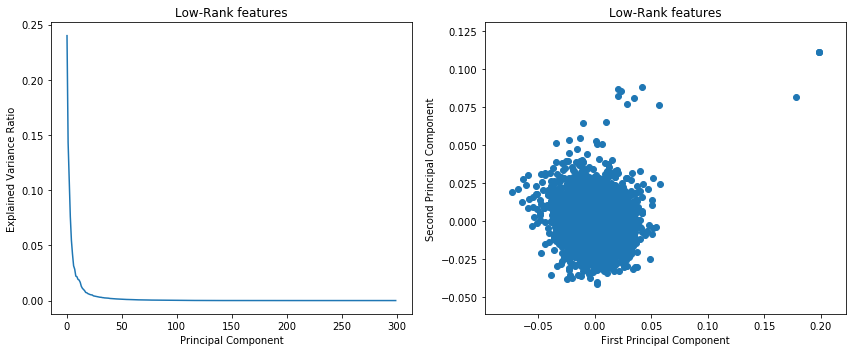

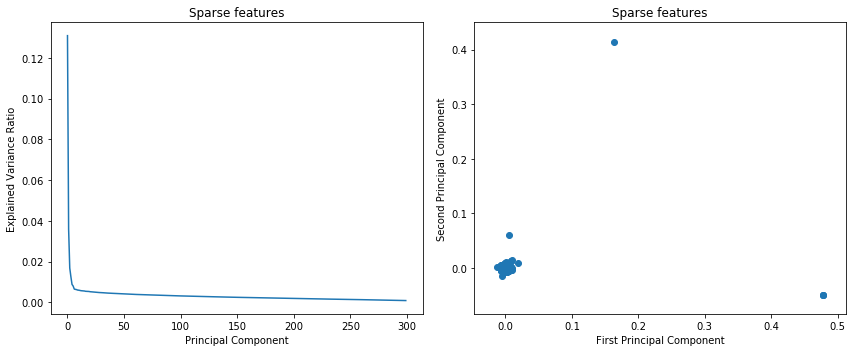

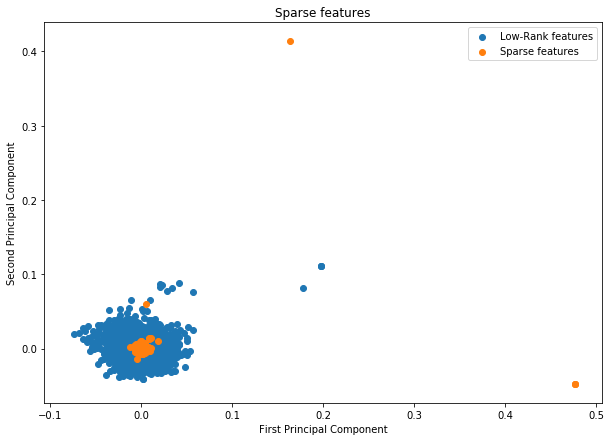

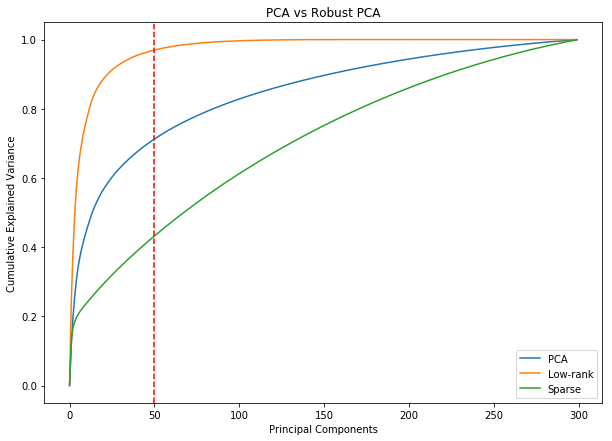

n = 50

PCA
0.712469827338
0.00324687569634

Low-Rank
0.969743509027
0.00118127001812


In [52]:
v1 ,dic_1 = rpca_eval(L,S,50)

### R_PCA dganguli

In [26]:
# R-PCA using principle component pursuit by alternating directions - dganguli

rpca_3 = R_pca(train_features,mu=20.551593457853397)
L3, S3 = rpca_3.fit(max_iter=10000, iter_print=100)


iteration: 1, error: 0.35479527449556514
iteration: 33, error: 2.788530768620907e-05


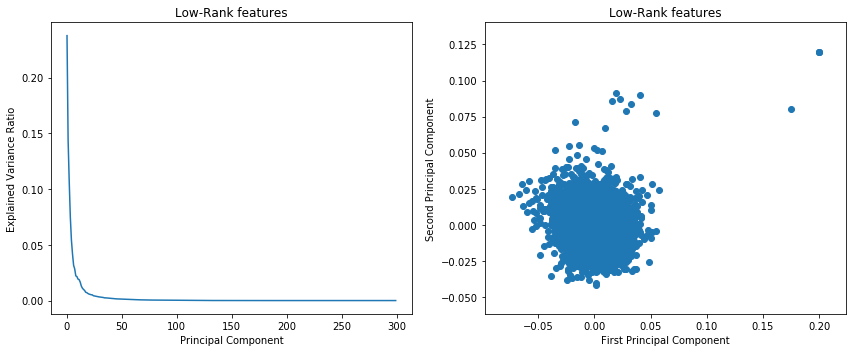

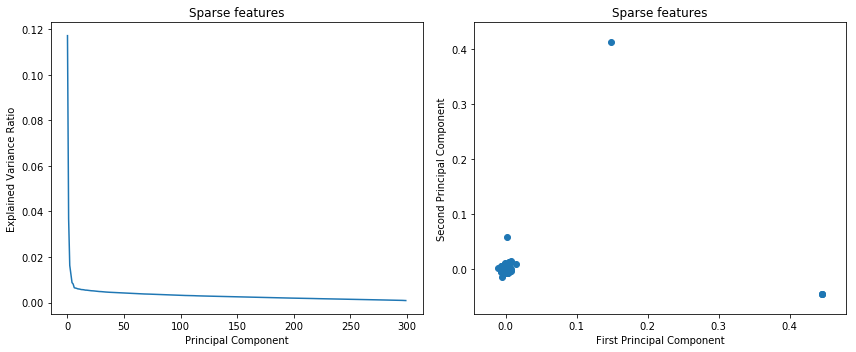

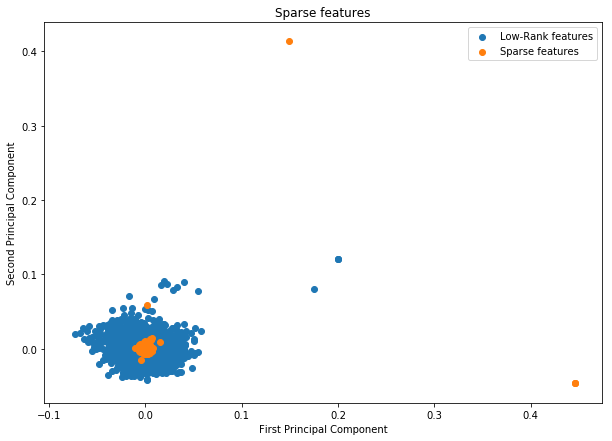

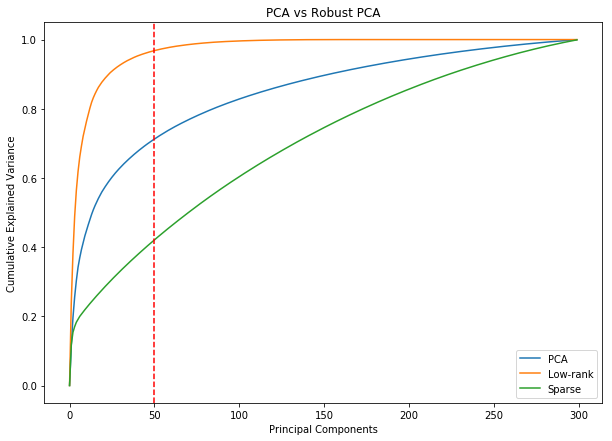

n = 50

PCA
0.712469827338
0.00324687569634

Low-Rank
0.968119911017
0.00121896461658


In [54]:
v3 , dic_3 = rpca_eval(L3,S3,50)

### ADMM - jkarnows

In [28]:
# Robust Principal Component Analysis via ADMM - jkarnows
# alternating direction method of multipliers (ADMM)
out_ = rpcaADMM(train_features)



iter	    r norm	   eps pri	    s norm	  eps dual	 objective
   1	    6.3768	    0.2925	   10.1593	    0.2899	     16.97
  10	    1.7746	    0.3263	    1.1080	    0.2844	     53.48
  20	    0.2999	    0.3400	    0.5028	    0.2734	     56.88


In [29]:
out_.keys()

dict_keys(['objval', 'r_norm', 's_norm', 'eps_pri', 'eps_dual', 'addm_toc', 'admm_iter', 'X1_admm', 'X2_admm', 'X3_admm'])

In [125]:
L_4 = out_['X2_admm']
S_4 = out_['X1_admm']

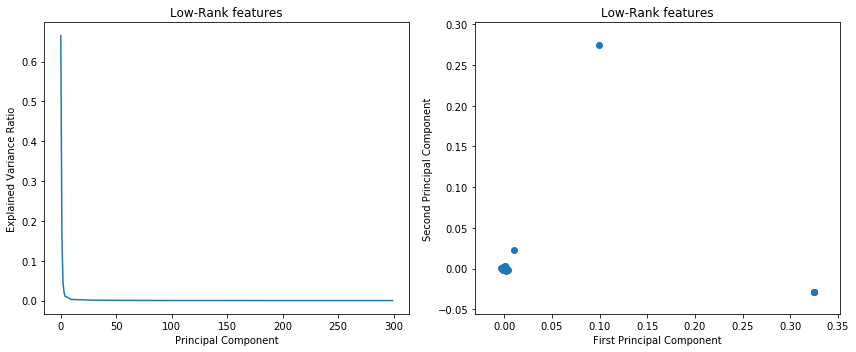

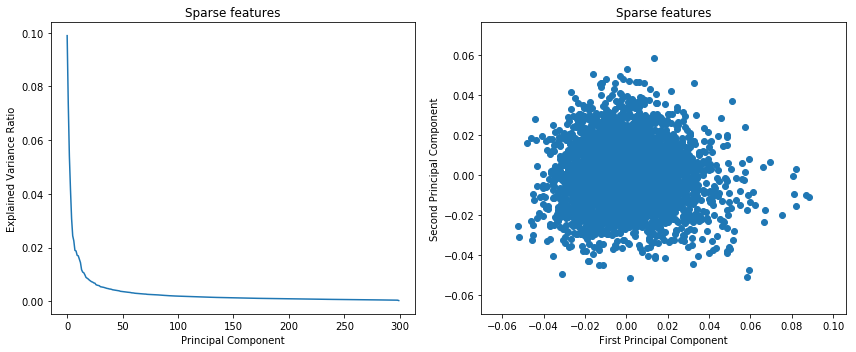

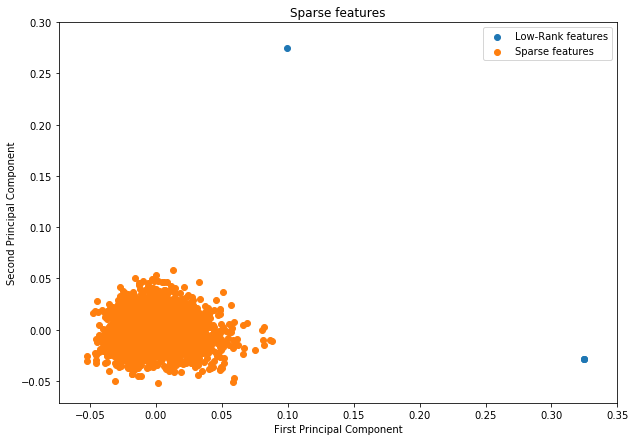

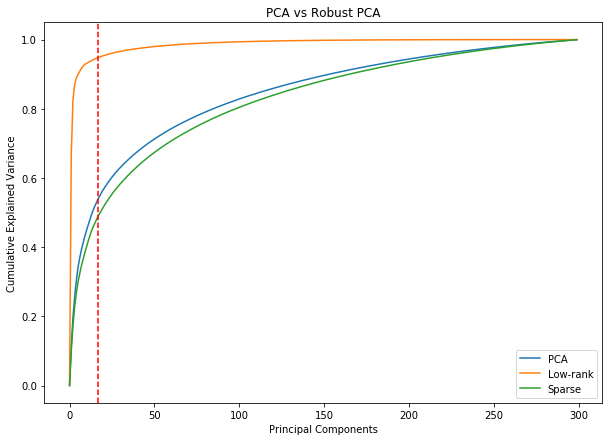

n = 17

PCA
0.540836338862
0.00945494644433

Low-Rank
0.948204724264
0.00184312147869


In [309]:
v4 , dic_4 = rpca_eval(L_4,S_4,17)

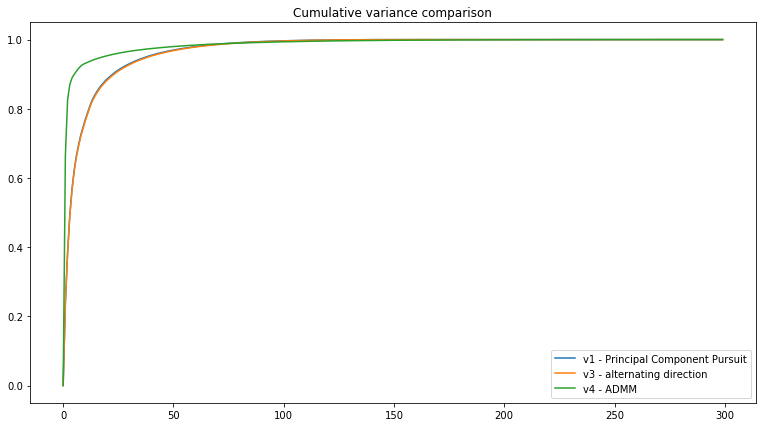

In [311]:
plt.figure(figsize=(13,7))
plt.plot(v1, label = 'v1 - Principal Component Pursuit')
plt.plot(v3, label = 'v3 - alternating direction')
plt.plot(v4, label = 'v4 - ADMM')
plt.legend()
plt.title('Cumulative variance comparison')
plt.show()

# SVM results

In [315]:

def SVM_eval(topics ,train_features, train_target,valid_features, valid_target,
             SVM_kernel = "linear", SVM_hyperparam = 0.001, verbose = True):
    
    AUC_valid = []
    print('---- SVM working ...')
    for x in range(0, len(topics)): 

        my_svm = svm.SVC(kernel=SVM_kernel, C=SVM_hyperparam, probability=True)
        
        my_svm.fit(train_features, train_target[x])         
        acc_train = my_svm.score(train_features, train_target[x])
        acc_valid = my_svm.score(valid_features, valid_target[x])

        y_proba_train =  my_svm.predict_proba(train_features)
        y_proba_valid =  my_svm.predict_proba(valid_features)
        auc_train = roc_auc_score(train_target[x], y_proba_train[:,1])
        auc_valid = roc_auc_score(valid_target[x], y_proba_valid[:,1])
        
        AUC_valid.append(auc_valid)
        
        if verbose:
            print("Topic {} - Acc on train: {}".format(topics[x], acc_train))
            print("Topic {} - Acc on validation: {}".format(topics[x], acc_valid))
            print("Topic {} - AUC on train: {}".format(topics[x], auc_train))
            print("Topic {} - AUC on validation: {}".format(topics[x], auc_valid))
            
    print('---- SVM Done! ----')
    return AUC_valid

In [101]:
topics = ['Educación', 'Campo', 'Sistema Financiero','Electoral', 'Derechos Humanos', 'Medio Ambiente', 'Laboral']

AUC_gloves =  SVM_eval(topics ,train_features, train_target,valid_features, valid_target,
             SVM_kernel = "linear", SVM_hyperparam = 0.001)

---- SVM working ...
Topic Educación - Acc on train: 0.8938533695383856
Topic Educación - Acc on validation: 0.8814139110604333
Topic Educación - AUC on train: 0.9287181364520913
Topic Educación - AUC on validation: 0.9259130261717584
Topic Campo - Acc on train: 0.9627252530239447
Topic Campo - Acc on validation: 0.9623717217787914
Topic Campo - AUC on train: 0.9442825607064017
Topic Campo - AUC on validation: 0.9241706161137441
Topic Sistema Financiero - Acc on train: 0.9854356948901506
Topic Sistema Financiero - Acc on validation: 0.9783352337514253
Topic Sistema Financiero - AUC on train: 0.8855592541014231
Topic Sistema Financiero - AUC on validation: 0.8569500674763832
Topic Electoral - Acc on train: 0.9516168847198223
Topic Electoral - Acc on validation: 0.9486887115165337
Topic Electoral - AUC on train: 0.9579978294819874
Topic Electoral - AUC on validation: 0.9458333333333333
Topic Derechos Humanos - Acc on train: 0.911379906196001
Topic Derechos Humanos - Acc on validation: 0.

In [319]:
AUC_pca = SVM_eval(topics , proj[0] , train_target, proj[1] , valid_target,
             SVM_kernel = "linear", SVM_hyperparam = 0.001, verbose = False)

---- SVM working ...
---- SVM Done! ----


In [320]:
AUC_pca_16 = SVM_eval(topics , proj[0][:,:16] , train_target, proj[1][:,:16] , valid_target,
             SVM_kernel = "linear", SVM_hyperparam = 0.001, verbose = False)

---- SVM working ...
---- SVM Done! ----


In [321]:
AUC_pca_50 = SVM_eval(topics , proj[0][:,:50] , train_target, proj[1][:,:50] , valid_target,
             SVM_kernel = "linear", SVM_hyperparam = 0.001, verbose = False)

---- SVM working ...
---- SVM Done! ----


In [323]:
AUC_pca_100 = SVM_eval(topics , proj[0][:,:100] , train_target, proj[1][:,:100] , valid_target,
             SVM_kernel = "linear", SVM_hyperparam = 0.001, verbose = False)

---- SVM working ...
---- SVM Done! ----


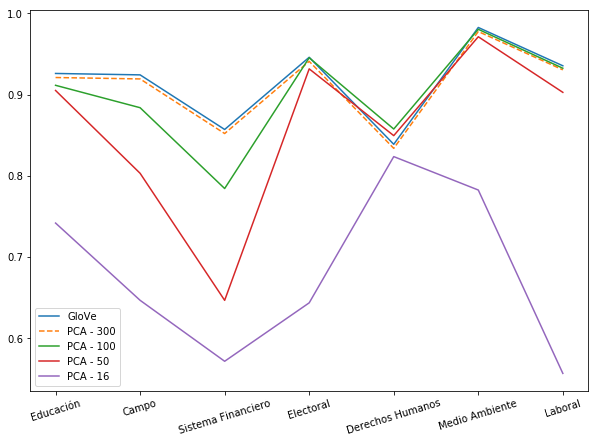

In [331]:
plt.figure(figsize=(10,7))
plt.plot(AUC_gloves, label = 'GloVe')
plt.plot(np.array(AUC_pca) -.005 , linestyle =  '--'  , label = 'PCA - 300')

plt.plot(AUC_pca_100, label = 'PCA - 100')
plt.plot(AUC_pca_50, label = 'PCA - 50')
plt.plot(AUC_pca_16, label = 'PCA - 16')
# plt.plot( AUC_Sparse , linestyle =  '--'  , label = 'Low Rank Features')
plt.legend()
plt.xticks( range(len(topics)), topics,rotation=17 )
plt.show()

## Full matrix for r_pca

In [292]:

t = train_features.shape[0]
full_matrix = np.concatenate((train_features, valid_features), axis=0)

# Low-rank + Sparse (Method 4)
out_full = rpcaADMM( scale(full_matrix, with_std = False) )
L_full = out_full['X2_admm']
S_full = out_full['X1_admm']





iter	    r norm	   eps pri	    s norm	  eps dual	 objective
   1	    1.8924	    0.2354	    2.4781	    0.2348	      0.66
  10	    0.6148	    0.2441	    0.2493	    0.2567	      8.42


In [293]:
L_train, L_val =  L_full[:t,:] , L_full[t:,:]
S_train, S_val =  S_full[:t,:] , S_full[t:,:]

In [294]:
AUC_LowRank = SVM_eval(topics , L_train , train_target, L_val , valid_target,
             SVM_kernel = "linear", SVM_hyperparam = 0.001, verbose = False)

---- SVM working ...
---- SVM Done! ----


In [295]:
AUC_Sparse = SVM_eval(topics , S_train , train_target, S_val , valid_target,
             SVM_kernel = "linear", SVM_hyperparam = 0.001, verbose = False)

---- SVM working ...
---- SVM Done! ----


In [296]:
AUC_LowRank_Sparse = SVM_eval(topics , np.concatenate( (L_train,S_train) , axis = 1 ) , train_target,
                        np.concatenate( (L_val,S_val) , axis = 1 ) , valid_target,
             SVM_kernel = "linear", SVM_hyperparam = 0.001, verbose = False)

---- SVM working ...
---- SVM Done! ----


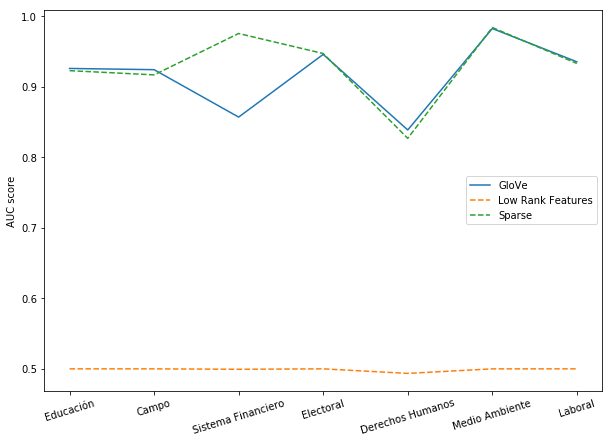

In [302]:
plt.figure(figsize=(10,7))

plt.plot(AUC_gloves, label = 'GloVe')
plt.plot( AUC_LowRank , linestyle =  '--'  , label = 'Low Rank Features')
plt.plot( AUC_Sparse , linestyle =  '--'  , label = 'Sparse')

# plt.plot( AUC_LowRank_Sparse , linestyle =  '--'  , label = 'Low Rank + Sparse')

plt.ylabel('AUC score')
plt.legend()
plt.xticks( range(len(topics)), topics,rotation=17 )
plt.show()

In [172]:
model1 = PCA()
model1.fit(S_train)
train_1 = model1.transform(S_train)
val_1 = model1.transform(S_val)

model2 = PCA()
model2.fit(S_full)
train_2 = model2.transform(S_train)
val_2 = model2.transform(S_val)


In [189]:
AUC_1 = SVM_eval(topics , train_1[:,:50] , train_target, val_1[:,:50] , valid_target,
             SVM_kernel = "linear", SVM_hyperparam = 0.001, verbose = False)

---- SVM working ...
---- SVM Done! ----


In [190]:
AUC_2 = SVM_eval(topics , train_2[:,:50] , train_target, val_2[:,:50] , valid_target,
             SVM_kernel = "linear", SVM_hyperparam = 0.001, verbose = False)

---- SVM working ...
---- SVM Done! ----


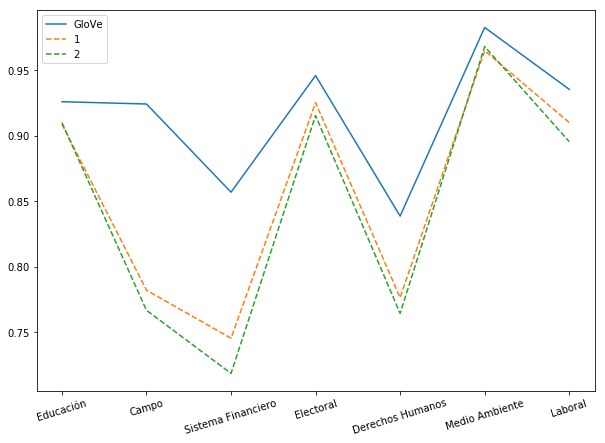

In [215]:
plt.figure(figsize=(10,7))

plt.plot(AUC_gloves, label = 'GloVe')
plt.plot( AUC_1 , linestyle =  '--'  , label = '1')
plt.plot( AUC_2 , linestyle =  '--'  , label = '2')

plt.legend()
plt.xticks( range(len(topics)), topics,rotation=17 )
plt.show()

In [257]:
sum(abs(np.array(S_train)) > .005) / (S_train.shape[0]* S_train.shape[1])

0.19999917715790339

In [334]:
B_train = np.copy(S_train)
B_train[abs(S_train) < .005 ] = 0

B_val = np.copy(S_val)
B_val[abs(S_val) < .005 ] = 0

AUC_005 = SVM_eval(topics , B_train , train_target, B_val  , valid_target,
             SVM_kernel = "linear", SVM_hyperparam = 0.001, verbose = False)

---- SVM working ...
---- SVM Done! ----


In [335]:
B_train_2 = np.copy(S_train)
B_train_2[abs(S_train) < 1e-3 ] = 0

B_val_2 = np.copy(S_val)
B_val_2[abs(S_val) < 1e-3 ] = 0

AUC_1e3 = SVM_eval(topics , B_train_2 , train_target, B_val_2 , valid_target,
             SVM_kernel = "linear", SVM_hyperparam = 0.001, verbose = False)

---- SVM working ...
---- SVM Done! ----


In [336]:
B_train_1 = np.copy(S_train)
B_train_1[abs(S_train) < 1e-2 ] = 0

B_val_1 = np.copy(S_val)
B_val_1[abs(S_val) < 1e-2 ] = 0

AUC_1e2 = SVM_eval(topics , B_train_1 , train_target, B_val_1 , valid_target,
             SVM_kernel = "linear", SVM_hyperparam = 0.001, verbose = False)

---- SVM working ...
---- SVM Done! ----


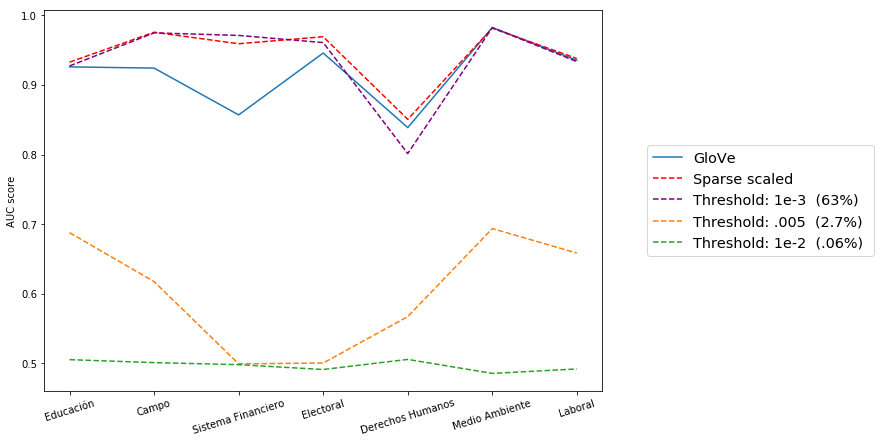

In [337]:
AUC_Sparse = [0.92279082495770726,0.916810282924027,0.97546313335787016,0.94706196581196589,0.82683091759033311,0.98400949930734205,0.93300461108680288]
AUC_Sparse_center = [0.9302418151059807,0.97235387045813593,0.96926757453073231,0.96866987179487174,0.81934848440302244,0.98335642192756778,0.93727912221062892]
AUC_Sparse_scaled = [0.93271718578963081,0.97569294844176369,0.95914611704085384,0.96923076923076923,0.85060124070208443,0.98151593113002167,0.9379270303927838]

plt.figure(figsize=(10,7))

plt.plot( AUC_gloves , label = 'GloVe')
# plt.plot( AUC_Sparse , linestyle =  '--'  , label = 'Sparse' , color = 'orange')
# plt.plot( AUC_Sparse_center , linestyle =  '--'  , label = 'Sparse centering' , color = 'green')
plt.plot( AUC_Sparse_scaled , linestyle =  '--'  , label = 'Sparse scaled', color = 'red' )

plt.plot( AUC_1e3 , linestyle =  '--'  , label = 'Threshold: 1e-3  (63%)', color = 'purple')
plt.plot( AUC_005 , linestyle =  '--'  , label = 'Threshold: .005  (2.7%)')
plt.plot( AUC_1e2 , linestyle =  '--'  , label = 'Threshold: 1e-2  (.06%) ')


# plt.ylim((.6,1))
plt.ylabel('AUC score')
plt.legend(loc = 'right', fontsize = 'x-large', bbox_to_anchor=(1.5, 0.5))
plt.xticks( range(len(topics)), topics,rotation=17 ) 
plt.show()

# 0.01558

### Extra: PCA over sparse matrix with threshold

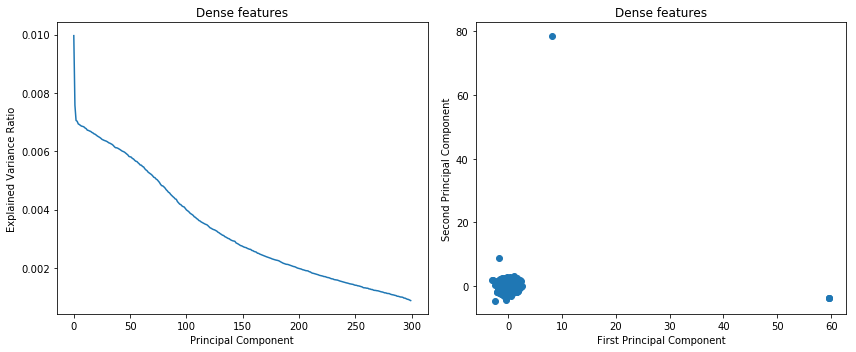

0.325948349589
0.00581065071134


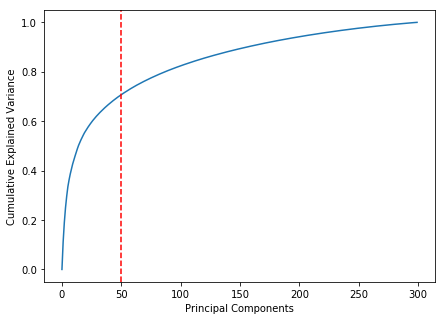

In [332]:
scaled = scale( B_train_2 , with_std = True)
pca_b = PCA()
pca_b.fit(scaled)

projected = pca_b.transform(scaled)
k = 'Dense features' 
    
plt.figure(figsize=(12,5)) 
plt.subplot(1, 2, 1)
plt.plot(pca_b.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title(k)
plt.subplot(1, 2, 2)
plt.scatter(projected[:,0],projected[:,1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(k)
plt.tight_layout()
plt.show()

var_r = pca_b.explained_variance_ratio_
    
n = 50
print (sum(var_r[:n]))
print (var_r[n])

cumvar = [ sum(var_ratio[0][:i]) for i in range(len(var_ratio[0])) ]

plt.figure(figsize=(7,5)) 
plt.plot(cumvar)
plt.axvline(n, color = 'r' , linestyle = '--' )
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()    

In [270]:
plt.legend?